# Foundation for Analysis in the Health Data

This practice is modified from BerkeleyX Data8x(edX)'s practice labs.

## Lab 2: Simulation, Estimation, Sampling & Inference


In [10]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Sampling

In [11]:
# Playing dice 
die = Table().with_column('face', np.arange(6)+1)
die

face
1
2
3
4
5
6


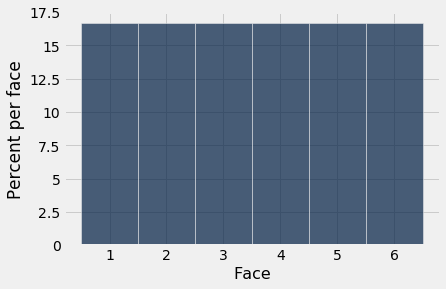

In [12]:
def face_hist(t):
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face')
    plots.xlabel('Face')

face_hist(die)

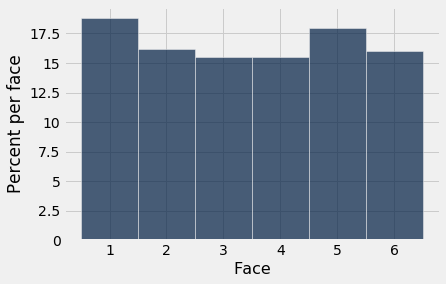

In [13]:
# Try changing the sample size of 1000 to larger and smaller numbers
face_hist(die.sample(1000))


# Large Random Samples

In [14]:
# united.csv is provided, upload it!
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


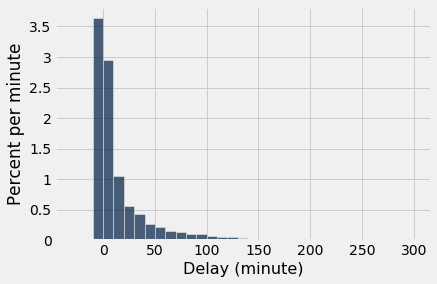

In [15]:
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=np.arange(-30, 301, 10))
    
delay_hist(united)

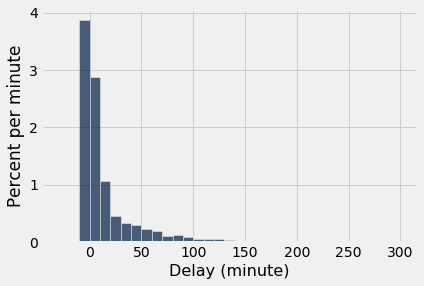

In [16]:
delay_hist(united.sample(1000))

# Simulation

In [17]:
k = 4
1 - (5/6) ** 4

0.5177469135802468

In [18]:
dice = np.arange(6) + 1
rolls = np.random.choice(dice, k)
rolls

array([6, 4, 2, 5])

In [19]:
sum(rolls == 6)

1

In [20]:
trials = 10000
successes = 0

for _ in np.arange(trials):
    rolls = np.random.choice(dice, k)
    if sum(rolls == 6) > 0:
        successes = successes + 1
        
successes / trials

0.5153

# Statistics
A parameter is a number associated with the population, whereas a statistic is a number calculated from a sample from that population.Usually, all we have is a sample, and we're trying to guess about what's going on in the population, so the statistic is something that we can compute directly, but it might be different had we had a different sample.

The parameter is what we'd like to know, and we're using our sample in order to make an estimate of what that parameter might be. So a statistic can be used as an estimate of a parameter,and by doing so, we're performing **statistical inference**.

###### In the above cells, we created an estimate--
an estimate of a particular event. What's the chance of getting at least one six? So our population is all the different outcomes that could possibly happen when rolling four dice. Each possible set of four outcomes has some probability, and only some of them contain a six. This number that we computed through the rules of probability is a parameter about the population of all four rolls of dice.

This is an estimate that we computed empirically by running a simulation, but that estimate could have come out differently.
We call this successes divided by trials--an estimate by simulation--so if we make many such estimates 10,000 times, and draw our histogram of the results. You can see the estimates were clustered around the true parameter and this is called the empirical distribution of a statistic.

According to the law of averages, we would expect that as long as we perform this simulation many times, the empirical distribution of a statistic will resemble the probability distribution of that same statistic, and that means we don't really need to compute the probability distribution; we can just perform the simulation like we did and see that most
of the values were right around the parameter.

Understanding how statistics vary as you draw multiple samples is a core concept in statistics because when you learn about the world through observation, you need to understand how much you might have been deceived by the variability in the sampling procedure itself, and you need to be able to express that variability when you perform statistical inference.

In [21]:
# This cell will take a long time to run

def estimate_by_simulation(trials):
    successes = 0

    for _ in np.arange(trials):
        rolls = np.random.choice(dice, k)
        if sum(rolls == 6) > 0:
            successes = successes + 1

    return successes / trials

estimates = []
for _ in np.arange(1000):
    estimates.append(estimate_by_simulation(10000))

KeyboardInterrupt: 

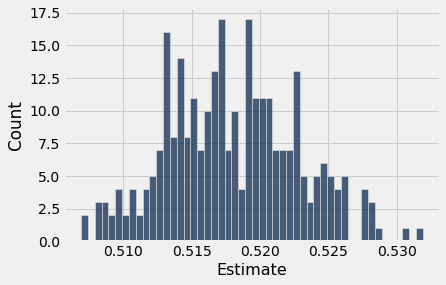

In [22]:
Table().with_column('Estimate', estimates).hist(bins=50, normed=False)

# Inference (Part 1)
### Overview
Punishment for crime has many philosophical justifications. An important one is that fear of punishment may deter people from committing crimes.

In the United States, some jurisdictions execute some people who are convicted of particularly serious crimes, such as murder. This punishment is called the death penalty or capital punishment. The death penalty is controversial, and deterrence has been one focal point of the debate. There are other reasons to support or oppose the death penalty, but in this project we'll focus on deterrence.

The key question about deterrence is: Does instituting a death penalty as a punishment for murder actually reduce the number of murders?

You might have a strong intuition in one direction, but the evidence turns out to be surprisingly complex. Different sides have variously argued that the death penalty has no deterrent effect and that each execution prevents 8 murders, all using statistical arguments! We'll try to come to our own conclusion.
### Data
The main data source for this project comes from a paper by three researchers, Dezhbakhsh, Rubin, and Shepherd. The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state. The researchers compiled the data from the FBI's Uniform Crime Reports.

Since crimes are committed by people, not states, we need to account for the number of people in each state when we're looking at state-level data. Murder rates are calculated as follows:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)

In [4]:
# crime_rates.csv is provided, upload it!
murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


### 1. Murder rates

The murder_rates table isn't enough to demonstrate an association between crimes and punishments. We would like to check for an association between murder rates and the existence of capital punishment, for each pair of a state and a year.

**Question 1.1.**
What additional information will we need before we can check for that association? Assign extra_info to a Python list (i.e. [#] or [#, #, ...]) containing the number(s) for all of the additional facts below that we require in order to check for association.

1) What year(s) the death penalty was introduced in each state (if any).

2) Day to day data about when murders occurred.

3) What year(s) the death penalty was abolished in each state (if any).

4) Rates of other crimes in each state.

In [5]:
extra_info = [1,3]
extra_info

[1, 3]

Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let's plot the murder rate trends for a few states, just to see the variety.

**Question 1.2.** <br/>Draw a line plot with years on the horizontal axis and murder rates on the 
vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call, `ak_mn.plot('Year')`.

*Hint*: To create two lines, you will need create the table `ak_mn` with two columns of murder rates, in addition to a column of years. This table will have the following structure:

| Year | Murder rate in Alaska | Murder rate in Minnesota |
|------|-----------------------|--------------------------|
| 1960 | 10.2                  | 1.2                      |
| 1961 | 11.5                  | 1                        |
| 1962 | 4.5                   | 0.9                      |

<center>... (41 rows omitted)</center>

In [6]:
# The next lines are creating a table
# containing only the Alaska information and one containing
# only the Minnesota information.
ak = murder_rates.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Murder rate in Alaska')
mn = murder_rates.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Murder rate in Minnesota')

ak_mn = ak.join('Year',mn,'Year')
ak_mn

Year,Murder rate in Alaska,Murder rate in Minnesota
1960,10.2,1.2
1961,11.5,1
1962,4.5,0.9
1963,6.5,1.2
1964,10.4,1.4
1965,6.3,1.4
1966,12.9,2.2
1967,9.6,1.6
1968,10.5,2.2
1969,10.6,1.9


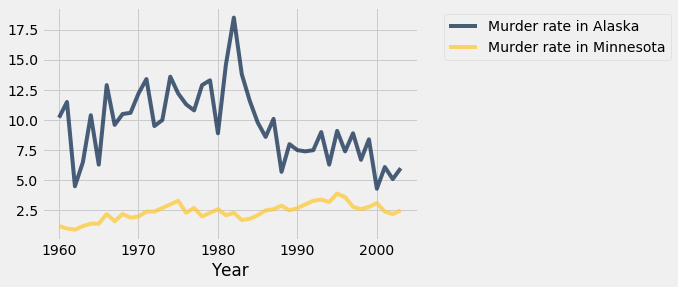

In [7]:
# Draw line plot
ak_mn.plot('Year')

What about the murder rates of other states? Say, for example, California and New York? Fill in the cell below to plot the murder rates of different pairs of states. **Note:** this should use similar code to question 1.2, with only the variable names changed. The cell below creates a cool interactive module!

In [8]:
# Compare the murder rates of any two states 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def state(state1, state2):
    state1_table = murder_rates.where('State', state1).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state1))
    state2_table = murder_rates.where('State', state2).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state2))
    s1_s2 = state1_table.join('Year',state2_table,'Year')
    s1_s2.plot('Year')
    plots.show()

states_array = murder_rates.group('State').column('State')

_ = interact(state,
             state1=widgets.Dropdown(options=list(states_array),value='California'),
             state2=widgets.Dropdown(options=list(states_array),value='New York')
            )

interactive(children=(Dropdown(description='state1', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

**Question 1.3.** <br/>Implement the function `most_murderous`, which takes a year (an integer) as its argument. It does two things:
1. It draws a horizontal bar chart of the 5 states that had the highest murder rates in that year.
2. It returns an array of the names of these states in order of *increasing* murder rate.

Assume that the argument is a year in `murder_rates`. 

array(['California', 'Mississippi', 'Texas', 'New York', 'Louisiana'],
      dtype='<U14')

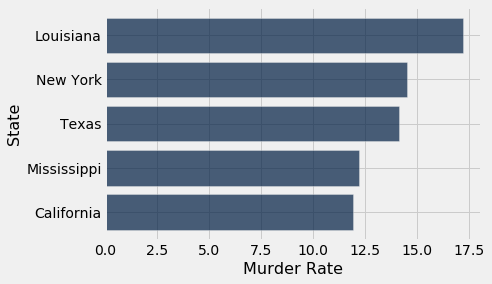

In [23]:
def most_murderous(year):
    # Assign most to a table of the most murderous states this year in ascending order.
    data_for_year = murder_rates.where('Year', year)
    sorted_data = data_for_year.sort('Murder Rate', descending = True)
    top_5 = sorted_data.take(np.arange(5))
    top_5.barh('State', 'Murder Rate')
    return top_5.sort('Murder Rate',descending = False).column('State')

most_murderous(1990) # California, Mississippi, ..., 

**Question 1.4.** <br/>How many more people were murdered in California in 1988 than in 1975? Assign `ca_change` to the answer.

*Hint*: Recall the formula given at the beginning of the project:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$


In [26]:
ca = murder_rates.where('State', are.equal_to('California'))
ca = ca.with_column('Number', ca.column('Murder Rate')*ca.column('Population')/100000)

ca_change = ca.where('Year',1988).column('Number').item(0)-ca.where('Year',1975).column('Number').item(0)
np.round(ca_change)

726.0

### 2. Changes in Murder Rates

In this section, we'll see **how to test this null hypothesis:** "For a set of U.S. states, the murder rate was equally likely to go up or down each year."

Murder rates vary widely across states and years, presumably due to the vast array of differences among states and across US history. Rather than attempting to analyze rates themselves, here we will restrict our analysis to whether or not murder rates increased or decreased over certain time spans. **We will not concern ourselves with how much rates increased or decreased; only the direction of the changes** - whether they increased or decreased.

The `np.diff` function takes an array of values and computes the differences between adjacent items of a list or array as such:

    [item 1 - item 0 , item 2 - item 1 , item 3 - item 2, ...]

Instead, we may wish to compute the difference between items that are two positions apart. For example, given a 5-element array, we may want:

    [item 2 - item 0 , item 3 - item 1 , item 4 - item 2]
    
The `diff_n` function below computes this result. Don't worry if the implementation uses unfamiliar features of Python, as long as you understand its behavior.

In [28]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

diff_n(make_array(1, 10, 100, 1000, 10000), 2)

array([  99,  990, 9900], dtype=int64)

**Question 2.1.** <br/>Implement the function `two_year_changes` that takes an array of murder rates for a state, ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns **the number of increases minus the number of decreases.**

For example, the array `r = make_array(10, 7, 12, 9, 13, 9, 11)` contains 3 increases (10 to 12, 7 to 9, and 12 to 13), 1 decrease (13 to 11), and 1 change that is neither an increase or decrease (9 to 9). Therefore, `two_year_changes(r)` would return 2, the difference between 3 increases and 1 decrease.

*Hint*: Consider using the `diff_n` function.

In [29]:
def two_year_changes(rates):
    "Return the number of increases minus the number of decreases after two years."
    rate_diff = diff_n(rates,2)
    count_num_increase = np.sum(rate_diff>0)
    count_num_decrease = np.sum(rate_diff<0)
    return count_num_increase - count_num_decrease

print('Alaska:',    two_year_changes(ak.column('Murder rate in Alaska')))
print('Minnesota:', two_year_changes(mn.column('Murder rate in Minnesota')))

Alaska: -5
Minnesota: 6


We can use `two_year_changes` to summarize whether rates are mostly increasing or decreasing over time for some state or group of states. Let's see how it varies across the 50 US states.

**Question 2.2.** <br/>Assign `changes_by_state` to a table with one row per state that has two columns: the `State` name and the `Murder Rate two_year_changes` statistic computed across all years in our data set for that state.  Its first 2 rows should look like this:

|State|Murder Rate two_year_changes|
|-|-|
|Alabama|-6|
|Alaska|-5||

<center>... (48 rows omitted)</center>


In [30]:
changes_by_state = murder_rates.group('State', two_year_changes ).drop(['Year two_year_changes','Population two_year_changes'])
changes_by_state

State,Murder Rate two_year_changes
Alabama,-6
Alaska,-5
Arizona,1
Arkansas,-1
California,17
Colorado,-4
Connecticut,4
Delaware,-3
Florida,-6
Georgia,-3


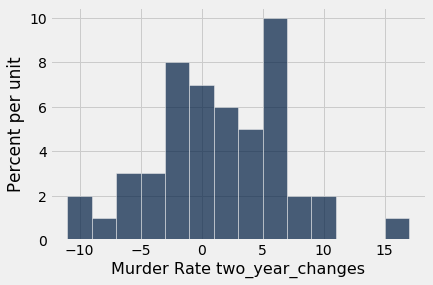

In [31]:
# Here is a histogram of the two-year changes for the states.
# Since there are 50 states, each state contributes 2% to one bar.
changes_by_state.hist("Murder Rate two_year_changes", bins=np.arange(-11, 19, 2))

Some states have more increases than decreases (a positive change), while some have more decreases than increases (a negative change). 

**Question 2.3.** <br/>Assign `total_changes` to the total increases minus the total decreases for all two-year periods and all states in our data set. For example, if the murder rate in Ohio went up 23 times and fell 17 times, the total change for Ohio would be 6. We want the total value for all the states together.

In [32]:
total_changes = sum(changes_by_state.column('Murder Rate two_year_changes'))
print('Total increases minus total decreases, across all states and years:', total_changes)

Total increases minus total decreases, across all states and years: 45


"More increases than decreases," one person exclaims, "Murder rates tend to go up across two-year periods. What dire times we live in."

"Not so fast," another person replies, "Even if murder rates just moved up and down uniformly at random, there would be some difference between the increases and decreases. There were a lot of states and a lot of years, so there were many chances for changes to happen. If state murder rates increase and decrease at random with equal probability, perhaps this difference was simply due to chance!"

**Question 2.4.** <br/>What is the total number of distinct pairs of a state and a two-year period? Assign `num_changes` to this value.

For example, Alaska during 1968 to 1970 would count as one distinct pair. Considering all states and all possible two-year periods, how many such pairs are there in total? 

In [37]:
#murder_rates.group('State', two_year_changes )
# run this first line and we can see from Year two_year_change = 42
# or.....For each state, exclude first two years from counting the 2-year change. 
num_changes =  murder_rates.group('State').num_rows*42
num_changes

2100

We now have enough information to perform a hypothesis test.

> **Null Hypothesis**: State murder rates increase and decrease over two-year periods as if 
"increase" or "decrease" were sampled at random from a uniform distribution, like a fair coin flip.

Murder rates can be more likely to go up or more likely to go down. Since we observed 45 more increases than decreases for all two year periods in our dataset, we formulate an alternative hypothesis in accordance with our suspicion:

> **Alternative Hypothesis**: State murder rates are more likely to increase over two-year periods.

If we had observed more decreases than increases, our alternative hypothesis would have been defined accordingly (that state murder rates are more likely to *decrease*). This is typical in statistical testing - we first observe a trend in the data and then run a hypothesis test to confirm or reject that trend.

*Technical note*: These changes in murder rates are not random samples from any population. They describe all murders in all states over all recent years. However, we can imagine that history could have been different, and that the observed changes are the values observed in only one possible world: the one that happened to occur. In this sense, we can evaluate whether the observed "total increases minus total decreases" is consistent with a hypothesis that increases and decreases are drawn at random from a uniform distribution.

*Important requirements for our test statistic:* We want to choose a test statistic for which large positive values are evidence in favor of the alternative hypothesis, and other values are evidence in favor of the null hypothesis. This is because once we've determined the direction of our alternative hypothesis, we only care about the tail in that direction. If, for example, our p-value cutoff was 5%, we'd check to see if our observed test statistic fell within the largest 5% of values in our null hypothesis distribution. 

Our test statistic should depend only on whether murder rates increased or decreased, not on the size of any change. Thus we choose:

> **Test Statistic**: The number of increases minus the number of decreases

Null Hypo : State Murder rates เพิ่มหรือลด ก็ต่อเมื่อโดนสุ่มว่าเพิ่มหรือลดจาก uniform distribution เหมือนโยนเหรียญ

Alternative Hypothesis : คาดว่า murder rates น่าจะเพิ่มขึ้น

สรุป : ใช้ 1-tails

The cell below samples increases and decreases at random from a uniform distribution 100 times. The final column of the resulting table gives the number of increases and decreases that resulted from sampling in this way. **Using `sample_from_distribution` is faster than using `sample` followed by `group` to compute the same result.**

In [38]:
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 100)

Change,Chance,Chance sample
Increase,0.5,45
Decrease,0.5,55


**Question 2.5.** <br/>Complete the simulation below, which samples `num_changes` increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis.  Your job is to
* fill in the function `simulate_under_null`, which simulates a single sample under the null hypothesis, and
* fill in its argument when it's called below.

In [39]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of our
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)
    return sample.where('Change', 'Increase').column('Chance sample')- sample.where('Change', 'Decrease').column('Chance sample')

uniform_samples = make_array()
for i in np.arange(5000):
    uniform_samples = np.append(uniform_samples, simulate_under_null(2100))

simulated_changes = Table().with_column('Test statistic under null', uniform_samples)
simulated_changes

Test statistic under null
-30
-78
62
72
18
8
24
-38
34
-48


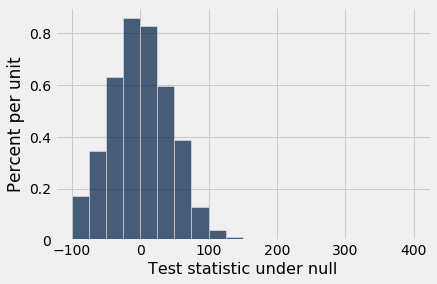

In [40]:
# Run this cell to visualize the empirical distribution of 
# the test statistic under the null hypothesis.
simulated_changes.hist(0, bins=np.arange(-100, 400+25, 25))

**Question 2.6.** Looking at this histogram, draw a conclusion about whether murder rates basically increase as often as they decrease. (Remember that we're only concerned with the *postive direction* because it supports our alternative hypothesis.) You **do not** need to compute a P-value for this question.

First, set `which_side` to `"Right"` or `"Left"` depending on which side of the histogram you need to look at to make your conclusion. 


Then, set `reject_null` to `True` if rates increase more than they decrease, and we can reject the null hypothesis. Set `reject_null` to `False` if the observed difference is typical under the null hypothesis.

### Please conclude here

which_side = ...........
reject_null = ..............

# Inference (Part 2)

As a reminder of our hypothesis test, here are the null hypothesis, alternative hypothesis, and test statistic from Part 1.

> **Null Hypothesis**: State murder rates increase and decrease over two-year periods as if 
"increase" or "decrease" were sampled at random from a uniform distribution, like a fair coin flip.

> **Alternative Hypothesis**: State murder rates are more likely to increase over two-year periods.

> **Test Statistic**: The number of increases minus the number of decreases

## 1. The death penalty

Some US states have the death penalty, and others don't, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year.

Using this information, we would like to investigate how the presence of the death penalty affects the murder rate of a state.

**Question 1.1.** <br/>Describe this investigation in terms of an experiment. What population are we studying? What is the control group? What is the treatment group? What outcome are we measuring? Be precise!

### Write your answers here.

- Population: ...
- Control Group: ...
- Treatment Group: ...
- Outcome: ...

### A Natural Experiment
We want to know whether the death penalty *causes* a change in the murder rate.  Why is it not sufficient to compare murder rates in places and times when the death penalty was in force with places and times when it wasn't?

In order to attempt to **investigate the causal relationship** between the death penalty and murder rates, we're going to take advantage of a *natural experiment*.  A natural experiment happens when something other than experimental design applies a treatment to one group and not to another (control) group, and we have some hope that the treatment and control groups don't have any other systematic differences.

Our natural experiment is this: in 1972, a Supreme Court decision called *Furman v. Georgia* banned the death penalty throughout the US.  Suddenly, many states went from having the death penalty to not having the death penalty.

As a first step, let's see how murder rates changed before and after the court decision.  We'll define the test as follows:

> **Population:** All the states that had the death penalty before the 1972 abolition.  (There is no control group for the states that already lacked the death penalty in 1972, so we must omit them.)  This includes all US states **except** Alaska, Hawaii, Maine, Michigan, Wisconsin, and Minnesota.

> **Treatment group:** The states in that population, in the year after 1972.

> **Control group:** The states in that population, in the year before 1972.

> **Null hypothesis:** Each state's murder rate was equally likely to be higher or lower in the treatment period than in the control period.  (Whether the murder rate increased or decreased in each state was like the flip of a fair coin.)

> **Alternative hypothesis:** The murder rate was more likely to increase.

Our alternative hypothesis is in keeping with our suspicion that murder rates increase when the death penalty is eliminated.  

*Technical Note:* It's not clear that the murder rates were a "sample" from any larger population.  Again, it's useful to imagine that our data could have come out differently and to test the null hypothesis that the murder rates were equally likely to move up or down.

The `death_penalty` table below describes whether each state allowed the death penalty in 1971.

In [41]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states

states = murder_rates.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty

State,Death Penalty
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
Florida,True
Georgia,True


In [42]:
num_death_penalty_states = death_penalty.where("Death Penalty", are.equal_to(True)).num_rows
num_death_penalty_states

44

**Question 1.2.** <br/>Assign `death_penalty_murder_rates` to a table with the same columns and data as `murder_rates`, but that has only the rows for states that had the death penalty in 1971.

The first 2 rows of your table should look like this:

|State|Year|Population|Murder Rate|
|-----|----|----------|-----------|
|Alabama|1960|3,266,740|12.4|
|Alabama|1961|3,302,000|12.9|

In [43]:
death_penalty_murder_rates =  murder_rates.with_column('Death Penalty', murder_rates.apply(had_death_penalty_in_1971, 0)).where('Death Penalty', are.equal_to (True)).drop('Death Penalty')
death_penalty_murder_rates

State,Year,Population,Murder Rate
Alabama,1960,"3,266,740",12.4
Alabama,1961,"3,302,000",12.9
Alabama,1962,"3,358,000",9.4
Alabama,1963,"3,347,000",10.2
Alabama,1964,"3,407,000",9.3
Alabama,1965,"3,462,000",11.4
Alabama,1966,"3,517,000",10.9
Alabama,1967,"3,540,000",11.7
Alabama,1968,"3,566,000",11.8
Alabama,1969,"3,531,000",13.7


The null hypothesis doesn't specify *how* the murder rate changes; it only talks about increasing or decreasing.  So, we will use the same test statistic we defined before.

**Question 1.3.** <br/>Assign `test_stat_72` to the value of the test statistic for the years 1971 to 1973 using the states in `death_penalty_murder_rates`. As before, the test statistic is, "the number of increases minus the number of decreases."

*Hint:* It may be helpful to use multiple lines to work through each part of your solution. One way to proceed is to `group` using your `two_year_changes` function on a table that contains only the range of years you care about.

In [44]:
test_stat_72 = death_penalty_murder_rates.where('Year', are.between(1971,1974)).group('State', two_year_changes)
test_stat_72 = np.sum(test_stat_72.column('Murder Rate two_year_changes'))
print('Test statistic from 1971 to 1973:', test_stat_72)

Test statistic from 1971 to 1973: 22


**Question 1.4.** <br/>Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 10,000 times.

You may find the `simulate_under_null` function from part 1 useful, but this is a rewrite compacted version. 
**Please recomply!!!**

In [46]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of your
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)
    return sample.column(2).item(0) - sample.column(2).item(1)

In [47]:
samples = make_array()
for i in np.arange(10000):
    pre_samples = simulate_under_null(44) # num_chances_to_change is the number of times the number changes.= no. of states?
    samples = np.append(samples, pre_samples) # out of the loop append  does not work
samples

array([-14.,  -2.,  -8., ...,  -2.,  -4.,  -4.])

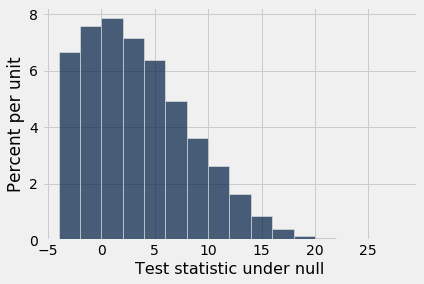

In [48]:
# Run this cell to draw an empirical histogram of the 
# statistic under the null hypothesis.
Table().with_column('Test statistic under null', samples).hist(bins=np.arange(-4, 28+2, 2))

**Question 1.5.** <br/>Complete the analysis as follows:
1. Compute a P-value.
2. Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses.
3. Describe your findings using simple, non-technical language. What does your analysis tell you about murder rates after the death penalty was suspended? What can you claim about causation from your statistical analysis?

### Write your answers here.
**P-value:** ...

**Conclusion about the hypotheses:** ...

**Findings:** ...

In [49]:
# Use this cell to compute the P-value 
#use 22 from Test statistic from 1971 to 1973
np.count_nonzero(samples >= 22)/10000

#P-value: 0.06
#Conclusion about the hypotheses: toward alternaltive
#Findings: The murder rate was more likely to increase.

0.0009

## 2. Further evidence

So far, we have discovered evidence that when executions were outlawed, the murder rate increased in many more states than we would expect from random chance. We have also seen that across all states and all recent years, the murder rate goes up about as much as it goes down over two-year periods. 

These discoveries seem to support the claim that eliminating the death penalty increases the murder rate. Should we be convinced? Let's conduct some more tests to strengthen our claim.

Conducting a test for this data set requires the following steps:

1. Select a table containing murder rates for certain states and all years,
2. Choose two years and compute the observed value of the test statistic,
3. Simulate the test statistic under the null hypothesis that increases and decreases are drawn uniformly at random, then
4. Compare the observed difference to the empirical distribution to compute a P-value.

This entire process can be expressed in a single function, called `run_test`. It takes the following arguments:

- a table of murder `rates` for certain states, sorted by state and year like `murder_rates`
- the year when the analysis starts (the comparison group is two years later)

It prints out the observed test statistic and returns the P-value for this statistic under the null hypothesis.

`run_test` works regardless of the direction of association in your alternative hypothesis by accounting for whether `observed_test_statistic` is negative or positive.

Run the cell below to define `run_test`. Make sure you understand what it's doing and why.

In [50]:
def run_test(rates, start_year):
    """Prints out the observed test statistic and returns a P-value for this statistic under the null hypothesis
    Parameters
    ----------
    rates : Table
       A table of murder rates for certain states, sorted by state and year like murder_rates
    start_year : int
       The year when the analysis starts
    """
    end_year = start_year + 2
    observed_test_statistic = sum(rates.where('Year', are.between_or_equal_to(start_year, end_year)).select('State', 'Murder Rate').group('State', two_year_changes).column(1))
    print('Test statistic', start_year, 'to', end_year, ':', observed_test_statistic)
    num_states = rates.group('State').num_rows
    
    samples = []
    for i in np.arange(5000):
        samples.append(simulate_under_null(num_states))
    samples = np.array(samples) # Convert from a list to an array
    
    if observed_test_statistic > 0:
        return sum(samples >= observed_test_statistic) / len(samples)
    elif observed_test_statistic < 0:
        return sum(samples <= observed_test_statistic) / len(samples)
    
run_test(death_penalty_murder_rates, 1971)

Test statistic 1971 to 1973 : 22


0.0004

### The rest of the states

We found a dramatic increase in murder rates for those states affected by the 1972 Supreme Court ruling, but what about the rest of the states? There were six states that had already outlawed execution at the time of the ruling.

**Question 2.1.** Create a table called `non_death_penalty_murder_rates` with the same columns as `murder_rates` but only containing rows for the six states without the death penalty in 1971. Perform the same test on this table. **Then**, set `reject_null_2` to whether their murder rates were also more likely to increase from 1971 to 1973.

In [51]:
non_death_penalty_murder_rates = murder_rates.with_column('Death Penalty', murder_rates.apply(had_death_penalty_in_1971, 0)).where('Death Penalty', are.equal_to (False)).drop('Death Penalty')
non_death_penalty_murder_rates.show(10)
run_test(non_death_penalty_murder_rates, 1971)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


Test statistic 1971 to 1973 : 1


0.3432

### Please conclude here
reject_null = ..........

### The death penalty reinstated

In 1976, the Supreme Court repealed its ban on the death penalty in its rulings on [a series of cases including Gregg v. Georgia](https://en.wikipedia.org/wiki/Gregg_v._Georgia), so the death penalty was reinstated where it was previously banned.  This generated a second natural experiment.  To the extent that the death penalty deters murder, reinstating it should decrease murder rates, just as banning it should increase them. Let's see what happened.

In [52]:
print("Increases minus decreases from 1975 to 1977 (when the death penalty was reinstated) among death penalty states:",
      sum(death_penalty_murder_rates.where('Year', are.between_or_equal_to(1975, 1977))
                                    .group('State', two_year_changes)
                                    .column("Murder Rate two_year_changes")))
run_test(death_penalty_murder_rates, 1975)

Increases minus decreases from 1975 to 1977 (when the death penalty was reinstated) among death penalty states: -18
Test statistic 1975 to 1977 : -18


0.0058

**Question 2.2.** Now we've analyzed states where the death penalty went away and came back, as well as states where the death penalty was outlawed all along.  What do you conclude from  the results of the tests we have conducted so far? Does all the evidence consistently point toward one conclusion, or is there a contradiction?

1) Our results point toward the conclusion that the death penalty moratorium increased murder rates.

2) Our results point toward the conclusion that the death penalty moratorium increased murder rates, but we have not accounted for differences over time as a confounding factor.

3) Our results don't allow us to make any conclusion about murder rates and death penalties.

4) Our results point toward the conclusion that the death penalty moratorium didn't influence murder rates.

5) None of these conclusions are valid, or multiple of these conclusions are valid

### Please conclude here
From above, we conclude to number.................

## 3. Visualization

While our analysis appears to support the conclusion that the death penalty deters murder, [a 2006 Stanford Law Review paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf) argues the opposite: that historical murder rates do **not** provide evidence that the death penalty deters murderers.

To understand their argument, we will draw a picture.  In fact, we've gone at this whole analysis rather backward; typically we should draw a picture first and ask precise statistical questions later!

What plot should we draw?

We know that we want to compare murder rates of states with and without the death penalty.  We know we should focus on the period around the two natural experiments of 1972 and 1976, and we want to understand the evolution of murder rates over time for those groups of states.  It might be useful to look at other time periods, so let's plot them all for good measure.

**Question 3.1.** <br/>Create a table called `average_murder_rates` with 1 row for each year in `murder_rates`.  It should have 3 columns:
* `Year`, the year,
* `Death penalty states`, the average murder rate of the states that had the death penalty in 1971, and
* `No death penalty states`, the average murder rate of the other states.

`average_murder_rates` should be sorted in increasing order by year.  Its first three rows should look like:

|Year|Death penalty states|No death penalty states|
|-|-|-|
|1960| | |
|1961| | |
|1962| | ||

*Hint 1:*  It's easiest to use `pivot`. We don't expect you to account for differences in population.

*Hint 2:* You can reorder columns in a table using `.select`.

In [53]:
# For reference, our solution used 5 method calls
''' see .pivot in datascience ....
Table.pivot(columns, rows, values=None, collect=None, zero=None)[source]
Generate a table with a column for each unique value in columns, with rows for each unique value in rows. 
Each row counts/aggregates the values that match both row and column based on collect.'''

death_tbl = death_penalty_murder_rates.with_column('StateType', 'Death penalty states').pivot('StateType','Year',values = 'Murder Rate', collect = np.average ) 
non_death_tbl = non_death_penalty_murder_rates.with_column('StateType', ' No death penalty states').pivot('StateType','Year',values = 'Murder Rate', collect = np.average )
average_murder_rates = death_tbl.with_column('No death penalty states',non_death_tbl.column(1) )
average_murder_rates

Year,Death penalty states,No death penalty states
1960,5.27955,3.55
1961,4.77727,3.68333
1962,4.61591,2.33333
1963,4.61364,2.75
1964,4.71136,3.4
1965,4.82727,3.18333
1966,5.43182,4.51667
1967,5.875,3.73333
1968,6.27045,4.73333
1969,6.50227,4.73333


**Let's take a look at the line plot below. Are the murder rates in these two groups of states related?**

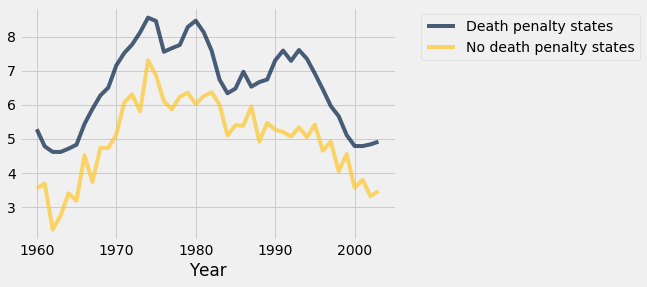

In [54]:
average_murder_rates.plot('Year')

Yes, murder rates in the two groups of states are related as we can see that they share a similar trend in the plot above.

Let's bring in another source of information: Canada.

In [55]:
canada = Table.read_table('canada.csv')
murder_rates_with_canada = average_murder_rates.join("Year", canada.select("Year", "Homicide").relabeled("Homicide", "Canada"))
murder_rates_with_canada.plot('Year')

FileNotFoundError: [Errno 2] File canada.csv does not exist: 'canada.csv'

The line plot we generated above is similar to a figure from the [paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf).

<img src="paper_plot.png" alt="Homicide Rates in the United States vs Canada."/>

Canada has not executed a criminal since 1962. Since 1967, the only crime that can be punished by execution in Canada is the murder of on-duty law enforcement personnel. The paper states, "The most striking finding is that the homicide rate in Canada has moved in
virtual lockstep with the rate in the United States."

From the plots, we can conclude that murder rates in the two countries moved together even around points where death penalty legislation was passed. This seems to suggest that other changes over time determined murder rates in both countries, rather than one or the other's legislation. This and the plots indicate that the death penalty is not an important factor in determining the murder rateFor more information, read the [paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf).

**Conclusion**. The authors that created this visualization argue that even though murder rates increased when the death penalty was taken away, and decreased when it was reintroduced, these changes were probably not caused by the death penalty itself.